In [25]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [26]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [27]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': File exists


In [28]:
%cd /mydrive/A5/

/content/gdrive/My Drive/A5


In [29]:
import cv2
import numpy as np
import os
import itertools
from operator import itemgetter
import sys


In [30]:
!ls

A5-Interface.ipynb  A5-Train.ipynb  darknet  samples  v1.jpg  v2.jpeg  v3.jpg


In [31]:
# Load Yolo
net = cv2.dnn.readNet("/content/gdrive/MyDrive/A5/darknet/backup/yolov4-custom_best.weights", "/content/gdrive/MyDrive/A5/darknet/cfg/yolov4-custom.cfg")
classes = []
with open("/content/gdrive/MyDrive/A5/darknet/data/spark.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
    
layer_names = net.getLayerNames()
output_layers = [layer_names[i-1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [84]:
# Loading image
img = cv2.imread("/content/gdrive/MyDrive/A5/v5.jpg")
img = cv2.resize(img, None, fx=1, fy=1)
height, width, channels = img.shape

In [85]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [86]:
from google.colab.patches import cv2_imshow

[ 4 23 24 27  6 31 12 16]


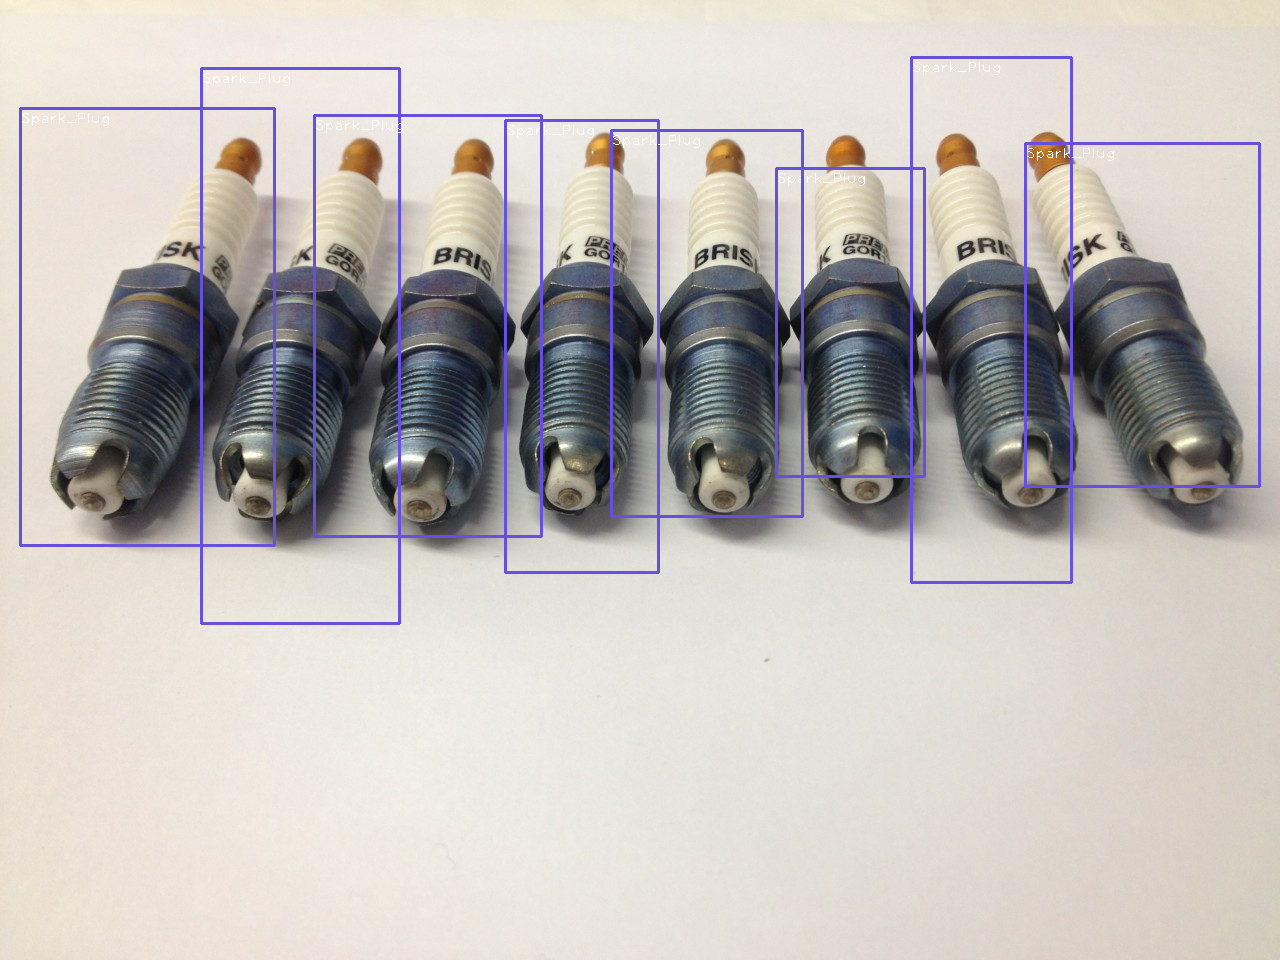

In [87]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
new_classes = []
new_boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.7:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            #cv2.rectangle(img, (x, y),(x + w ,y + h),(0, 255, 0), 2)
            
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            
#print(len(boxes))


indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

print(indexes)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]
        
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 15), font, 1, (255,255,255), 1)

cv2_imshow(img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()